<a href="https://colab.research.google.com/github/ManishKr2026/SmartBridge/blob/main/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub
from sklearn.model_selection import train_test_split
import matplotlib.image as matimage
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import cv2
import os

In [3]:
# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")
print("Path to dataset files:", path)
path = pathlib.Path(path)
path = os.path.join(path, 'Rice_Image_Dataset')
path = pathlib.Path(path)
print("Path to dataset files:", path)

100%|██████████| 219M/219M [00:01<00:00, 158MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/rice-image-dataset/versions/1/Rice_Image_Dataset


In [4]:
arborio = list(path.glob('Arborio/*'))[:100]
basmati = list(path.glob('Basmati/*'))[:100]
ipsala = list(path.glob('Ipsala/*'))[:100]
jasmine = list(path.glob('Jasmine/*'))[:100]
karacadag = list(path.glob('Karacadag/*'))[:100]

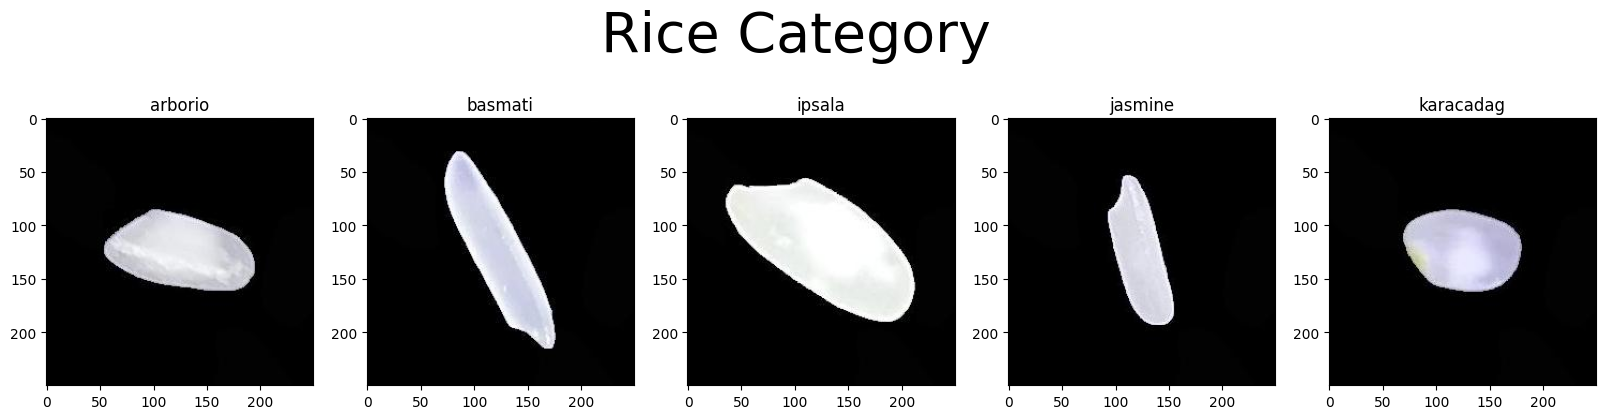

In [5]:
arborio_img   = matimage.imread(arborio[0])
basmati_img   = matimage.imread(basmati[0])
ipsala_img    = matimage.imread(ipsala[0])
jasmine_img   = matimage.imread(jasmine[0])
karacadag_img = matimage.imread(karacadag[0])

fig,ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle ('Rice Category', fontsize=40)

ax[0].set_title("arborio")
ax[1].set_title("basmati")
ax[2].set_title("ipsala")
ax[3].set_title("jasmine")
ax[4].set_title("karacadag")
ax[0].imshow(arborio_img)

ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

plt.show()

In [6]:
data_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# numerical labels for the categories
data_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [7]:
X, y = [], [] # X = images, y = labels
for label, images in data_images.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
    X.append(resized_img)
    y.append(data_labels[label])


X = np.array(X)
X = X/255
y = np.array(y)

In [8]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [9]:
print(X_train.shape, X_test.shape, X_val.shape)

(375, 224, 224, 3) (93, 224, 224, 3) (32, 224, 224, 3)
